In [89]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## 1 a

In [90]:
col_list = ['radius','texture','perimeter','area','smoothness','compactness',
            'concavity','concave points','symmetry','fractal dimension']
se_list = [i + '_SE' for i in col_list]
worst_list = ['Worst_' + i for i in col_list]
columns = col_list + se_list + worst_list
columns = ['id','Diagnosis'] + columns
df = pd.read_csv('WDBC.csv',names = columns)
df.drop('id',axis=1,inplace=True)
df

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,...,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave points,Worst_symmetry,Worst_fractal dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [91]:
df_benign = df[df['Diagnosis']=='B']
df_benign_test = df_benign[:math.floor(len(df_benign)*0.2)]
df_malign = df[df['Diagnosis']=='M']
df_malign_test = df_malign[:math.floor(len(df_malign)*0.2)]

## 1 (b) i

In [92]:
from sklearn.metrics import classification_report,auc, roc_curve, accuracy_score,confusion_matrix,precision_recall_fscore_support
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [93]:
def get_metrics(y,predictions,M,train_test):
    precision,recall,f1_score,_ = precision_recall_fscore_support(y,predictions,average='macro')
    accuracy = accuracy_score(y,predictions)
    y_replaced = replace_data(y)
    predictions_replaced = replace_data(pd.Series(predictions))
    fpr, tpr, _ = roc_curve(y_replaced, predictions_replaced)
    AUC_score = auc(fpr,tpr)
    
    ###### ROC and CONFUSION MATRIX ######
    if train_test is not 'Cluster':
        if M==25:
            plot_roc_curve(fpr,tpr,train_test,M)
            print('------------Confusion Matrix({}) for iteration {}----------------'.format(train_test,M))
            print(confusion_matrix(y,predictions))
            print('-----------------------------------------------------')
    return accuracy,precision,recall,f1_score,AUC_score

def replace_data(df1):
    df_replaced = df1
    df_replaced = df_replaced.replace('B',0)
    df_replaced = df_replaced.replace('M',1)
    return df_replaced

def plot_roc_curve(fpr, tpr,train_test,M):
    #print("ROC CURVE")
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve({}) for iteration {}'.format(train_test,M))
    plt.legend()
    plt.show()


In [94]:
X = df.drop('Diagnosis',axis=1)
y = df['Diagnosis'].copy()

x_values = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_values)
X_normalized = pd.DataFrame(x_scaled,columns=X.columns)

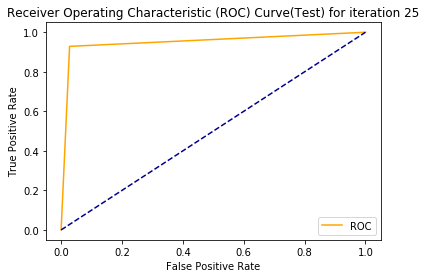

------------Confusion Matrix(Test) for iteration 25----------------
[[70  2]
 [ 3 39]]
-----------------------------------------------------


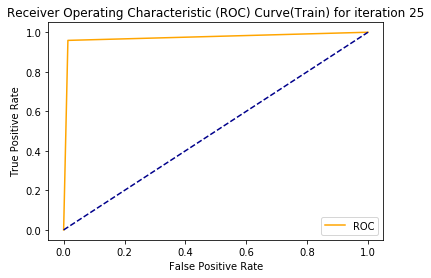

------------Confusion Matrix(Train) for iteration 25----------------
[[281   4]
 [  7 163]]
-----------------------------------------------------


---------Average Test Scores-----------


Average Test Accuracy 0.9628654970760228
Average Test Precision 0.9647231120063915
Average Test Recall 0.9557208994708994
Average Test F1 score 0.9596379535546458
Average Test AUC 0.9557208994708994


---------Average Train Scores-----------


Average Train Accuracy 0.9826373626373627
Average Train Precision 0.983888860589172
Average Train Recall 0.9790591675266601
Average Train F1 score 0.9813476252687554
Average Train AUC 0.9790591675266601


In [95]:
avg_test_precision = 0
avg_test_recall = 0
avg_test_f1_score = 0
avg_test_accuracy = 0
avg_test_AUC = 0
avg_train_precision = 0
avg_train_recall = 0
avg_train_f1_score = 0
avg_train_accuracy = 0
avg_train_AUC = 0
iterations = 30

for M in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,
                                                stratify=y, 
                                                test_size=0.20,
                                                   random_state = M)
    parameters = {"C": [i for i in np.arange(0,5,0.1)]}
    SVCLinear=LinearSVC(penalty="l1", dual=False,max_iter = 10000)
    gridCV = GridSearchCV(SVCLinear, parameters, cv=5, n_jobs=-1)
    gridCV.fit(X_train, y_train)
    train_predictions = gridCV.predict(X_train)
    test_predictions = gridCV.predict(X_test)
    
    ######## TEST METRICS ########
    test_accuracy,test_precision,test_recall,test_f1_score,test_auc = get_metrics(y_test,test_predictions,M,'Test')
    avg_test_accuracy+=test_accuracy
    avg_test_precision+= test_precision
    avg_test_recall+=test_recall
    avg_test_f1_score+=test_f1_score
    avg_test_AUC+=test_auc
    
    ######## TRAIN METRICS #######
    train_accuracy,train_precision,train_recall,train_f1_score,train_auc = get_metrics(y_train,train_predictions,M,'Train')
    avg_train_accuracy+=train_accuracy
    avg_train_precision+= train_precision
    avg_train_recall+=train_recall
    avg_train_f1_score+=train_f1_score
    avg_train_AUC+=train_auc
    
    
###### PRINTING METRICS #######    
print('\n')
print('---------Average Test Scores-----------')
print('\n')
print('Average Test Accuracy {}'.format(avg_test_accuracy/iterations))
print('Average Test Precision {}'.format(avg_test_precision/iterations))
print('Average Test Recall {}'.format(avg_test_recall/iterations))
print('Average Test F1 score {}'.format(avg_test_f1_score/iterations))
print('Average Test AUC {}'.format(avg_test_AUC/iterations))


print('\n')
print('---------Average Train Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_train_accuracy/iterations))
print('Average Train Precision {}'.format(avg_train_precision/iterations))
print('Average Train Recall {}'.format(avg_train_recall/iterations))
print('Average Train F1 score {}'.format(avg_train_f1_score/iterations))
print('Average Train AUC {}'.format(avg_train_AUC/iterations))



## 1 (b) ii A

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,
                                            stratify=y, 
                                            test_size=0.20)
X_labelled, X_unlabelled, y_labelled, _ = train_test_split(X_train,y_train,
                                                          stratify=y_train,
                                                          test_size=0.50)
parameters = {"C": [i for i in np.arange(0,5,0.1)]}
SVCLinear=LinearSVC(penalty="l1", dual=False,max_iter = 10000)
gridCV = GridSearchCV(SVCLinear, parameters, cv=5, n_jobs=-1)
gridCV.fit(X_labelled, y_labelled)
best_cv_model = gridCV.best_estimator_

print("Test Accuracy score:", gridCV.score(X_test, y_test))
print("Best C value is: ", gridCV.best_params_)

Test Accuracy score: 0.9649122807017544
Best C value is:  {'C': 0.4}


##  1 (b) ii B

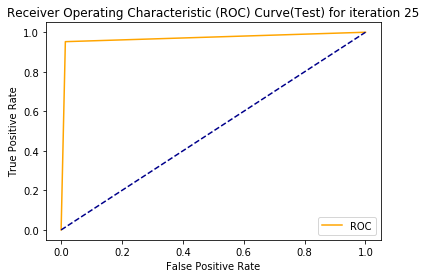

------------Confusion Matrix(Test) for iteration 25----------------
[[71  1]
 [ 2 40]]
-----------------------------------------------------


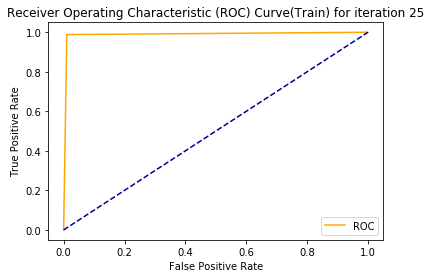

------------Confusion Matrix(Train) for iteration 25----------------
[[283   3]
 [  2 167]]
-----------------------------------------------------


---------Average Test Scores-----------


Average Test Accuracy 0.965204678362573
Average Test Precision 0.9623564759753548
Average Test Recall 0.9648478835978838
Average Test F1 score 0.9629462470550141
Average Test AUC 0.9648478835978838


---------Average Train Scores-----------


Average Train Accuracy 0.9910622710622711
Average Train Precision 0.9912602681018546
Average Train Recall 0.9897981063208855
Average Train F1 score 0.9905094862669805
Average Train AUC 0.9897981063208854


In [97]:
avg_test_precision = 0
avg_test_recall = 0
avg_test_f1_score = 0
avg_test_accuracy = 0
avg_test_AUC = 0
avg_train_precision = 0
avg_train_recall = 0
avg_train_f1_score = 0
avg_train_accuracy = 0
avg_train_AUC = 0
iterations = 30

    
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,
                                        stratify=y, 
                                        test_size=0.20,
                                        random_state=2678)

for M in range(iterations):

    X_labelled, X_unlabelled, y_labelled, _ = train_test_split(X_train,y_train,
                                                              stratify=y_train,
                                                              test_size=0.50,
                                                              random_state=M)
    parameters = {"C": [i for i in np.arange(0,5,0.1)]}
    SVCLinear=LinearSVC(penalty="l1", dual=False,max_iter = 10000)
    gridCV = GridSearchCV(SVCLinear, parameters, cv=5, n_jobs=-1)
    gridCV.fit(X_labelled, y_labelled)
    best_cv_model = gridCV.best_estimator_

    for i in range(X_unlabelled.shape[0]):
        x_furthest = pd.DataFrame(X_unlabelled.iloc[np.argmax((gridCV.decision_function(X_unlabelled)))]).transpose()
        y_furthest = gridCV.predict(x_furthest)
        X_labelled = X_labelled.append(x_furthest,ignore_index = True)
        y_labelled = y_labelled.append(pd.DataFrame(y_furthest))

        X_unlabelled.drop(x_furthest.index,axis=0,inplace=True)
        best_cv_model.fit(X_labelled, y_labelled)

    train_predictions = best_cv_model.predict(X_labelled)
    test_predictions = best_cv_model.predict(X_test)
    
    ######## TEST METRICS ########
    test_accuracy,test_precision,test_recall,test_f1_score,test_auc = get_metrics(y_test,test_predictions,M,'Test')
    avg_test_accuracy+=test_accuracy
    avg_test_precision+= test_precision
    avg_test_recall+=test_recall
    avg_test_f1_score+=test_f1_score
    avg_test_AUC+=test_auc
    
    ######## TRAIN METRICS #######
    train_accuracy,train_precision,train_recall,train_f1_score,train_auc = get_metrics(y_labelled,train_predictions,M,'Train')
    avg_train_accuracy+=train_accuracy
    avg_train_precision+= train_precision
    avg_train_recall+=train_recall
    avg_train_f1_score+=train_f1_score
    avg_train_AUC+=train_auc

    
###### PRINTING METRICS #######    
print('\n')
print('---------Average Test Scores-----------')
print('\n')
print('Average Test Accuracy {}'.format(avg_test_accuracy/iterations))
print('Average Test Precision {}'.format(avg_test_precision/iterations))
print('Average Test Recall {}'.format(avg_test_recall/iterations))
print('Average Test F1 score {}'.format(avg_test_f1_score/iterations))
print('Average Test AUC {}'.format(avg_test_AUC/iterations))


print('\n')
print('---------Average Train Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_train_accuracy/iterations))
print('Average Train Precision {}'.format(avg_train_precision/iterations))
print('Average Train Recall {}'.format(avg_train_recall/iterations))
print('Average Train F1 score {}'.format(avg_train_f1_score/iterations))
print('Average Train AUC {}'.format(avg_train_AUC/iterations))

## 1 (b) iii A

In [98]:
from sklearn.cluster import KMeans

avg_precision = 0
avg_recall = 0
avg_f1_score = 0
avg_accuracy = 0
avg_AUC = 0
iterations = 30

y_replaced = replace_data(y)

for M in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y_replaced,
                                        stratify=y_replaced, 
                                        test_size=0.20,
                                        random_state=M)
    k_means = KMeans(n_clusters=2,init='random',n_init = 10)
    k_means_predictions = k_means.fit_predict(X_train)
    accuracy,precision,recall,f1_score,AUC = get_metrics(y_train,k_means_predictions,M,'Cluster')
    
    avg_precision+=precision
    avg_recall+=recall
    avg_f1_score+=f1_score
    avg_accuracy+=accuracy
    avg_AUC+=AUC
    #print(precision)

print('---------Average Cluster Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_accuracy/iterations))
print('Average Train Precision {}'.format(avg_precision/iterations))
print('Average Train Recall {}'.format(avg_recall/iterations))
print('Average Train F1 score {}'.format(avg_f1_score/iterations))
print('Average Train AUC {}'.format(avg_AUC/iterations))

---------Average Cluster Scores-----------


Average Train Accuracy 0.524102564102564
Average Train Precision 0.5269553967645142
Average Train Recall 0.5210990712074304
Average Train F1 score 0.5001657729688153
Average Train AUC 0.5210990712074304


## 1 (b) iii B

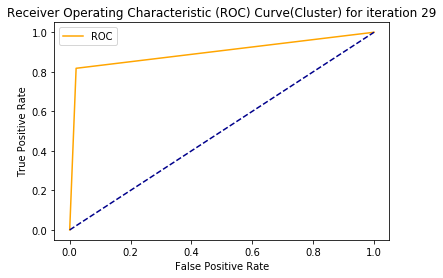

------------Confusion Matrix(Clustering) for iteration 29----------------
[[279   6]
 [ 31 139]]
-----------------------------------------------------
---------Average Cluster Scores-----------


Average Train Accuracy 0.9276190476190478
Average Train Precision 0.9344266819372267
Average Train Recall 0.9113261093911249
Average Train F1 score 0.9207159514246778
Average Train AUC 0.9113261093911249


In [99]:
from scipy.spatial.distance import cdist
from collections import Counter

avg_precision = 0
avg_recall = 0
avg_f1_score = 0
avg_accuracy = 0
avg_AUC = 0
iterations = 30

for M in range(iterations):


    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_replaced,
                                        stratify=y_replaced, 
                                        test_size=0.20,
                                        random_state=M)

    k_means = KMeans(n_clusters=2,init='random',n_init = 10).fit(X_train)
    k_means_predictions = k_means.predict(X_train)

    cluster1_nearest_30 = y_train.iloc[np.argsort(cdist(X_train,k_means.cluster_centers_,'euclidean')[:,0],axis=0)[:30]]
    cluster2_nearest_30 = y_train.iloc[np.argsort(cdist(X_train,k_means.cluster_centers_,'euclidean')[:,1],axis=0)[:30]]
    
    cluster1_label = Counter(cluster1_nearest_30).most_common(1)[0][0]
    cluster2_label = Counter(cluster2_nearest_30).most_common(1)[0][0]
    
    new_labels  = pd.Series(k_means_predictions).apply(lambda x: cluster1_label if x == 0 else cluster2_label)
        
    accuracy,precision,recall,f1_score,AUC = get_metrics(y_train,new_labels,M,'Cluster')

    avg_precision+=precision
    avg_recall+=recall
    avg_f1_score+=f1_score
    avg_accuracy+=accuracy
    avg_AUC+=AUC    
    
    if M==29:
        fpr, tpr, _ = roc_curve(y_train, new_labels)
        plot_roc_curve(fpr,tpr,'Cluster',M)
        print('------------Confusion Matrix({}) for iteration {}----------------'.format('Clustering',M))
        print(confusion_matrix(y_train, new_labels))
        print('-----------------------------------------------------')    
    
print('---------Average Cluster Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_accuracy/iterations))
print('Average Train Precision {}'.format(avg_precision/iterations))
print('Average Train Recall {}'.format(avg_recall/iterations))
print('Average Train F1 score {}'.format(avg_f1_score/iterations))
print('Average Train AUC {}'.format(avg_AUC/iterations))



## 1 (b) iii C

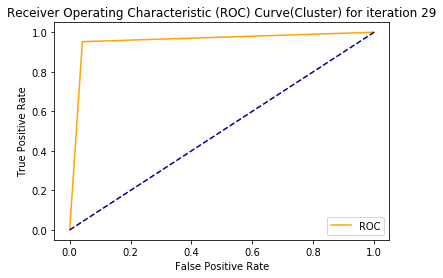

------------Confusion Matrix(Clustering) for iteration 29----------------
[[69  3]
 [ 2 40]]
-----------------------------------------------------
---------Average Cluster Scores-----------


Average Train Accuracy 0.4982456140350877
Average Train Precision 0.49848607725383853
Average Train Recall 0.4981150793650793
Average Train F1 score 0.49315554035333703
Average Train AUC 0.4981150793650793


In [104]:
avg_precision = 0
avg_recall = 0
avg_f1_score = 0
avg_accuracy = 0
avg_AUC = 0
iterations = 30


for M in range(iterations):
    y_pred = []
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_replaced,
                                        stratify=y_replaced, 
                                        test_size=0.20,
                                        random_state=M)

        
    k_means = KMeans(n_clusters=2,init='random',n_init = 10).fit(X_test)
    k_means_predictions = k_means.predict(X_test)

    cluster1_dist = cdist(X_test,k_means.cluster_centers_,'euclidean')[:,0]
    cluster2_dist = cdist(X_test,k_means.cluster_centers_,'euclidean')[:,1]
    
    for i in range(len(k_means_predictions)):
        if cluster1_dist[i] > cluster2_dist[i]:
            y_pred.append(0)
        else:
            y_pred.append(1)
    #print(len(y_pred))
    accuracy,precision,recall,f1_score,AUC = get_metrics(y_test,y_pred,M,'Cluster')

    avg_precision+=precision
    avg_recall+=recall
    avg_f1_score+=f1_score
    avg_accuracy+=accuracy
    avg_AUC+=AUC    
    
    if M==29:
        fpr, tpr, _ = roc_curve(y_test,y_pred)
        plot_roc_curve(fpr,tpr,'Cluster',M)
        print('------------Confusion Matrix({}) for iteration {}----------------'.format('Clustering',M))
        print(confusion_matrix(y_test,y_pred))
        print('-----------------------------------------------------')    
    
print('---------Average Cluster Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_accuracy/iterations))
print('Average Train Precision {}'.format(avg_precision/iterations))
print('Average Train Recall {}'.format(avg_recall/iterations))
print('Average Train F1 score {}'.format(avg_f1_score/iterations))
print('Average Train AUC {}'.format(avg_AUC/iterations))
 

## 1 (b) iv A

In [105]:
from sklearn.cluster import SpectralClustering

avg_precision = 0
avg_recall = 0
avg_f1_score = 0
avg_accuracy = 0
avg_AUC = 0
iterations = 30

y_replaced = replace_data(y)

for M in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y_replaced,
                                        stratify=y_replaced, 
                                        test_size=0.20,
                                        random_state=M)
    spectral = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    spectral_predictions = spectral.fit_predict(X_train)
    accuracy,precision,recall,f1_score,AUC = get_metrics(y_train,spectral_predictions,M,'Cluster')
    
    avg_precision+=precision
    avg_recall+=recall
    avg_f1_score+=f1_score
    avg_accuracy+=accuracy
    avg_AUC+=AUC
    
#     if M==29:
#         fpr, tpr, _ = roc_curve(y_train, spectral_predictions)
#         plot_roc_curve(fpr,tpr,'Cluster',M)
#         print('------------Confusion Matrix({}) for iteration {}----------------'.format('Clustering',M))
#         print(confusion_matrix(y_train, spectral_predictions))
#         print('-----------------------------------------------------') 

print('---------Average Spectral Cluster Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_accuracy/iterations))
print('Average Train Precision {}'.format(avg_precision/iterations))
print('Average Train Recall {}'.format(avg_recall/iterations))
print('Average Train F1 score {}'.format(avg_f1_score/iterations))
print('Average Train AUC {}'.format(avg_AUC/iterations))

---------Average Spectral Cluster Scores-----------


Average Train Accuracy 0.6263003663003662
Average Train Precision 0.346534306992486
Average Train Recall 0.5000601995184039
Average Train F1 score 0.38565881506544036
Average Train AUC 0.5000601995184039


## 1(b) iv B

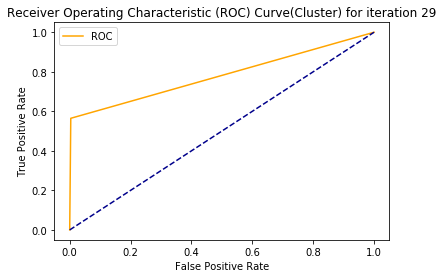

------------Confusion Matrix(Clustering) for iteration 29----------------
[[284   1]
 [ 74  96]]
-----------------------------------------------------
---------Average Cluster Scores-----------


Average Train Accuracy 0.6218315018315018
Average Train Precision 0.6342631187249578
Average Train Recall 0.6077743378052974
Average Train F1 score 0.6019615214521085
Average Train AUC 0.6077743378052974


In [106]:
from scipy.spatial.distance import cdist
from collections import Counter

avg_precision = 0
avg_recall = 0
avg_f1_score = 0
avg_accuracy = 0
avg_AUC = 0
iterations = 30

for M in range(iterations):


    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_replaced,
                                        stratify=y_replaced, 
                                        test_size=0.20,
                                        random_state=M)

    spectral = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    spectral_predictions = spectral.fit_predict(X_train)

    cluster1_common = y_train.iloc[np.argwhere(spectral_predictions == 0).reshape(-1, )]
    cluster2_common = y_train.iloc[np.argwhere(spectral_predictions == 1).reshape(-1, )]
    
    
    cluster1_label = Counter(cluster1_common).most_common(1)[0][0]
    cluster2_label = Counter(cluster2_common).most_common(1)[0][0]
    
    
    spectral_predictions[cluster1_common] = cluster1_label
    spectral_predictions[cluster2_common] = cluster2_label

    new_labels  = spectral_predictions 
        
    accuracy,precision,recall,f1_score,AUC = get_metrics(y_train,new_labels,M,'Cluster')

    avg_precision+=precision
    avg_recall+=recall
    avg_f1_score+=f1_score
    avg_accuracy+=accuracy
    avg_AUC+=AUC    
    
    if M==29:
        fpr, tpr, _ = roc_curve(y_train, spectral_predictions)
        plot_roc_curve(fpr,tpr,'Cluster',M)
        print('------------Confusion Matrix({}) for iteration {}----------------'.format('Clustering',M))
        print(confusion_matrix(y_train, spectral_predictions))
        print('-----------------------------------------------------')    
    
print('---------Average Cluster Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_accuracy/iterations))
print('Average Train Precision {}'.format(avg_precision/iterations))
print('Average Train Recall {}'.format(avg_recall/iterations))
print('Average Train F1 score {}'.format(avg_f1_score/iterations))
print('Average Train AUC {}'.format(avg_AUC/iterations))



## 1(b) iv C

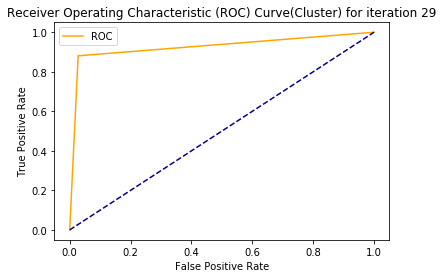

------------Confusion Matrix(Clustering) for iteration 29----------------
[[70  2]
 [ 5 37]]
-----------------------------------------------------
---------Average Cluster Scores-----------


Average Train Accuracy 0.683625730994152
Average Train Precision 0.7083984152380769
Average Train Recall 0.6566137566137565
Average Train F1 score 0.6526444530171325
Average Train AUC 0.6566137566137565


In [103]:
avg_precision = 0
avg_recall = 0
avg_f1_score = 0
avg_accuracy = 0
avg_AUC = 0
iterations = 30


for M in range(iterations):
    y_pred = []
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_replaced,
                                        stratify=y_replaced, 
                                        test_size=0.20,
                                        random_state=M)

        
    spectral = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    spectral_test_predictions = spectral.fit_predict(X_test)

    cluster1_common = y_test.iloc[np.argwhere(spectral_test_predictions == 0).reshape(-1, )]
    cluster2_common = y_test.iloc[np.argwhere(spectral_test_predictions == 1).reshape(-1, )]
    
    
    cluster1_label = Counter(cluster1_common).most_common(1)[0][0]
    cluster2_label = Counter(cluster2_common).most_common(1)[0][0]
    
    
    spectral_test_predictions[cluster1_common] = cluster1_label
    spectral_test_predictions[cluster2_common] = cluster2_label

    new_test_labels  = spectral_test_predictions 
        
    accuracy,precision,recall,f1_score,AUC = get_metrics(y_test,new_test_labels,M,'Cluster')

    avg_precision+=precision
    avg_recall+=recall
    avg_f1_score+=f1_score
    avg_accuracy+=accuracy
    avg_AUC+=AUC    
    
    if M==29:
        fpr, tpr, _ = roc_curve(y_test,new_test_labels)
        plot_roc_curve(fpr,tpr,'Cluster',M)
        print('------------Confusion Matrix({}) for iteration {}----------------'.format('Clustering',M))
        print(confusion_matrix(y_test,new_test_labels))
        print('-----------------------------------------------------')    
    
print('---------Average Cluster Scores-----------')
print('\n')
print('Average Train Accuracy {}'.format(avg_accuracy/iterations))
print('Average Train Precision {}'.format(avg_precision/iterations))
print('Average Train Recall {}'.format(avg_recall/iterations))
print('Average Train F1 score {}'.format(avg_f1_score/iterations))
print('Average Train AUC {}'.format(avg_AUC/iterations))
 

## 1 (b) v

As we can see from the above tests, Supervised learning models achieved higher accuracy and recall scores.

Supervised Test Recall= 0.9557208994708994 <br>
Supervised Train Recall= 0.9790591675266601 <br>
Semi Supervised Test Recall= 0.9648478835978838 <br>
Semi Supervised Train Recall= 0.9897981063208855 <br>
K means Train Recall= 0.5210990712074304 <br>
K means majority polling Train Recall= 0.9113261093911249 <br>
K means majority polling Test Recall= 0.4981150793650793 <br>
Spectral Train Recall= 0.5000601995184039 <br>
Spectral majority polling Train Recall= 0.6077743378052974 <br>
Spectral majority polling Test Recall= 0.6566137566137565 

## 2 a

In [107]:
from sklearn.preprocessing import StandardScaler

col_Names=["variance", "skewness", "curtosis", "entropy of image","class"]
df=pd.read_csv(r'data_banknote_authentication.csv',names=col_Names)
X_Data = df.iloc[:, :-1]
Y_Data = df.iloc[:, -1:]
X_data_ST = StandardScaler().fit(X_Data).transform(X_Data)
X_train, X_test, y_train, y_test = train_test_split(X_data_ST, Y_Data, test_size=0.344, random_state=42)

## 2 (b) i

In [113]:
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import random
import warnings
warnings.filterwarnings("ignore")
parameters = {"C":  np.logspace(-2, 5, 10)}
Test_acc = []
for j in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data_ST, Y_Data, test_size=0.344, random_state=j)
    X_train = pd.DataFrame(data=X_train, columns=["variance", "skewness", "curtosis", "entropy of image"])
    y_train.reset_index(inplace=True)
    y_train.drop("index", axis=1,inplace=True)
    Test_accuracy = []
    l=list(X_train.index.values.tolist())
    z=pd.Series(l)
    X_train_sampled = pd.DataFrame(columns=X_train.columns)
    y_train_sampled = pd.DataFrame(columns=y_train.columns)
    y_train_sampled= y_train_sampled.astype('int')
    for i in range(90):
        X1 = random.sample(z.tolist(), 10)
        X_train_sampled=X_train_sampled.append(X_train.loc[X1]) 
        y_train_sampled=y_train_sampled.append(y_train.loc[X1])
        gfg = np.unique(y_train_sampled) 
        if(len(gfg) > 1):
            z.drop(labels=X1,inplace=True)
            SVCLinear=LinearSVC(penalty="l1",dual=False,max_iter = 3000,)
            gridCV = GridSearchCV(SVCLinear, parameters, cv=5, n_jobs=-1)
            gridCV.fit(X_train_sampled, y_train_sampled)
            bestClf = gridCV.best_estimator_
            y_predict = bestClf.predict(X_test)
            #print("Using L1 penalized SVM, The best params are: ", gridCV.best_params_)
            Test_accuracy.append(1 - accuracy_score(y_test, y_predict))
    #average=np.average(Test_accuracy)  
    Test_acc.append(Test_accuracy)
    

## 2 (b) ii

In [ ]:
from statistics import mean
Test_acc_1 = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data_ST, Y_Data, test_size=0.344, random_state=i)
    X_train = pd.DataFrame(data=X_train, columns=["variance", "skewness", "curtosis", "entropy of image"])
    y_train.reset_index(inplace=True)
    y_train.drop("index", axis=1,inplace=True)
    l=list(X_train.index.values.tolist())
    z=pd.Series(l)
    X_train_sampled = pd.DataFrame(columns=X_train.columns)
    y_train_sampled = pd.DataFrame(columns=y_train.columns)
    y_train_sampled= y_train_sampled.astype('int')
    X_train_sampled_1 = pd.DataFrame(columns=X_train.columns)
    y_train_sampled_1 = pd.DataFrame(columns=y_train.columns)
    y_train_sampled_1= y_train_sampled_1.astype('int')
    parameters = {"C":  [1,10,100,1000]}
    Test_accuracy_1 = []
    for j in range(90):
        X1 = random.sample(z.tolist(), 10)
        X_train_sampled=X_train_sampled.append(X_train.loc[X1]) 
        y_train_sampled=y_train_sampled.append(y_train.loc[X1])
        gfg = np.unique(y_train_sampled) 
        Top_Ten_points=[]
        #Top_Ten_points_1=[]
        if(len(gfg) > 1):
            SVCLinear=LinearSVC(penalty="l1",dual=False,max_iter = 3000)
            gridCV = GridSearchCV(SVCLinear, parameters, cv=5, n_jobs=-1)
            gridCV.fit(X_train_sampled, y_train_sampled)
            Distance=[gridCV.decision_function(X_train_sampled)]
            #print(Distance)
            AbsDistance=[abs(k) for k in Distance]
            #print(AbsDistance)
            a1 = np.asarray(AbsDistance)
            a2 = np.argsort(-1*a1)
            Top_Ten_points = a2.tolist()
            #Top_Ten_points_1=Top_Ten_points.sort() 
            #print('top',Top_Ten_points)
            X_train_sampled.reset_index(inplace=True)
            X_train_sampled.drop("index", axis=1,inplace=True)
            y_train_sampled.reset_index(inplace=True)
            y_train_sampled.drop("index", axis=1,inplace=True)
            X_train_sampled_1=X_train_sampled_1.append(X_train_sampled.loc[Top_Ten_points[0]]) 
            #print(X_train_sampled_1)
            y_train_sampled_1=y_train_sampled_1.append(y_train_sampled.loc[Top_Ten_points[0]])
            #print(y_train_sampled_1)
            gfg1 = np.unique(y_train_sampled_1) 
            if(len(gfg1) > 1):
                SVCLinear=LinearSVC(penalty="l1",dual=False,max_iter = 3000)
                gridCV = GridSearchCV(SVCLinear, parameters, cv=5, n_jobs=-1)
                gridCV.fit(X_train_sampled_1, y_train_sampled_1)
                bestClf = gridCV.best_estimator_
                y_predict = bestClf.predict(X_test)
                #print("Using L1 penalized SVM, The best params are: ", gridCV.best_params_)
                Test_accuracy_1.append(1 - accuracy_score(y_test, y_predict))
    #average=np.average(Test_accuracy_1)
    Test_acc_1.append(Test_accuracy_1)

## 2 (c)

In [ ]:
passive_average = np.average(np.array(Test_acc),axis=0)
active_average = np.average(np.array(Test_acc_1),axis=0)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(range(10,901,10), passive_average, linestyle='dashed',label='Passive Learning')
plt.plot(range(10,901,10), active_average, linestyle='dashed',label='Active Learning')
plt.title('Error Rate vs. Training Size')
plt.xlabel('Training Size')
plt.ylabel('Error Rate')
plt.legend()